<a href="https://colab.research.google.com/github/SighanoCel/My-data-science-project/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing python liabraries to clean, analyze and visualize data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the raw datset.

df= pd.read_csv('/content/drive/MyDrive/Keaggle datasets project/Classification/Customer-Churn-Records.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# dataset glossary to understand the meaning of the features.

with open('/content/drive/MyDrive/Keaggle datasets project/Classification/Bank Churn Glossary.txt','r') as f:

  print(f.read())

RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.
Surname—the surname of a customer has no impact on their decision to leave the bank.
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography—a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
NumOfPr

In [4]:
# dropping the irrelevant dataset for our analysis and modeling

df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [6]:
# renaming the target variable. from exited to churn just for simplicity

df= df.rename(columns={'Exited':'churn'})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
# let's check if there are missing and/or duplicated values within the dataset.
# we notice that the dataset is complete. may be it has been cleaned before.

print(df[df.isnull()].sum())

print(df[df.duplicated()].sum())

CreditScore           0.0
Geography               0
Gender                  0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
churn                 0.0
Complain              0.0
Satisfaction Score    0.0
Card Type               0
Point Earned          0.0
dtype: object
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance               0.0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary       0.0
churn                   0
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
dtype: object


In [8]:
# checking the pearson correlation between the target variable and the other features, we notice that
# the feature "Complain" is linearly correlated to the "churn" at almost a 100%.
# we decide to remove as it's a strong indicator of a potential data leakage and could definitely lead to overfitting.
# If this feature is used in training, the model might simply learn to predict churn
# whenever a customer has a complaint, without truly learning the underlying patterns that lead to churn for customers who don't complain.

print(df.corr(method='pearson',numeric_only=True)['churn'].sort_values(ascending=False))

df=df.drop('Complain',axis=1)

churn                 1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: churn, dtype: float64


In [9]:
# let's group data where each row represents a churn group (0 or 1),
# and the columns show the average value of each numeric feature for that group.
# This helps to identify which features have different average values for customers who churn compared to those who don't,
# providing insights into potential drivers of churn.

df.groupby('churn').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
churn,,,,,,,,,,
0,651.837855,37.408063,5.032781,72742.750663,1.544210,0.707109,0.554635,99726.853141,3.017960,607.044084
1,645.414622,44.835623,4.934740,91109.476006,1.475466,0.699215,0.360648,101509.908783,2.997547,604.448479


## Categorical features encoding

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [11]:
with open('/content/drive/MyDrive/Keaggle datasets project/Classification/Bank Churn Glossary.txt','r') as f:

  print(f.read())

RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.
Surname—the surname of a customer has no impact on their decision to leave the bank.
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography—a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
NumOfPr

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  churn               10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Performing Label encoding on all the categorical features as we will use a decision tree model.
# Unlike some model such as the linear regression and the SVP, the Decision Trees don't inherently
# make the assumption of continuous quantive relationship between the values that has been encoded.
# They simply use the numerical values to determine the best splitting points to separate the data

from sklearn.preprocessing import LabelEncoder

lab_encoder= LabelEncoder()

features_object= df.select_dtypes(include='object')

for column in features_object:

  df[column] = lab_encoder.fit_transform(df[column])

df.head(8)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1,5,0,484
6,822,0,1,50,7,0.00,2,1,1,10062.80,0,2,3,206
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1,2,0,282


In [14]:
# assigning our df to a new variable name "data",
# to keep the original DataFrame "df" unchanged while performing
# operations or modifications on the data using the "data" variable.

data=df

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


# Modeling

## Modeling - Part 1 - First attempt - We just model data as it is

In [16]:
# let's import the varoìious sklearn libraries helpful to perform
# machine learning task (split data, training the model, predicting and evaluating)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# here we prepare our dataset for machine learning by separating
# the features (independent variables) from the target variable (dependent variable).

X= data.drop('churn',axis=1)

y= df['churn']

In [18]:
# let's splits our dataset into training and testing sets.
# This is a crucial step in machine learning to evaluate how well our model generalizes to unseen data.

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [19]:
print(len(X_train))
print(len(X_test))

7000
3000


In [20]:
# Importing the Counter in order to perform a comparative analysis between,
# the number of churn (1) compared to the number of non churn(0) on the training set.
# In this specific case, we can notice that the number of churn is about 20% of the total training set.
# for a banking churn task, the balance between the 0 and 1 is acceptable,
# but having more churn case than this could be helpful to avoid a target imballanced issue.
# Let's look forward how will be the first prediction and score

from collections import Counter

print('Target_Train',Counter(y_train))

print('percentage churn on train split :', 1411/7000*100,'%')

Target_Train Counter({0: 5589, 1: 1411})
percentage churn on train split : 20.15714285714286 %


In [21]:
# we train the decision tree model on our training set and make
# prediction and score not only on the test but also on the training set.
# limiting the maximum depth of the decision tree to 4,
# can help prevent overfitting by simplifying the tree
# and making it less likely to capture noise in the training data.

dt_model = DecisionTreeClassifier(max_depth=4)

dt_model.fit(X_train,y_train)

test_predict = dt_model.predict(X_test)
test_score = dt_model.predict_proba(X_test)
print('test score prob :',set(test_score[:,1]))

# the test_score is an array where each row corresponds to a sample and each column corresponds to a class (0 or 1).
# The values in each row are the probabilities, and they sum up to 1.
# test_score[:,1] selects the probabilities of the positive class (churn = 1) on test prediction.


train_predict = dt_model.predict(X_train)
train_score = dt_model.predict_proba(X_train)
print('train score prob :',set(train_score[:,1]))
# train_score[:,1] selects the probabilities of the positive class (churn = 1) on train prediction.


test score prob : {np.float64(0.11316872427983539), np.float64(0.2138157894736842), np.float64(0.0899390243902439), np.float64(0.10867733782645324), np.float64(0.33562822719449226), np.float64(0.3), np.float64(0.5961538461538461), np.float64(0.856140350877193), np.float64(0.02865013774104683), np.float64(0.9393939393939394), np.float64(0.0), np.float64(0.32432432432432434), np.float64(0.8666666666666667), np.float64(0.975)}
train score prob : {np.float64(0.33562822719449226), np.float64(0.2138157894736842), np.float64(0.10867733782645324), np.float64(0.0899390243902439), np.float64(0.5961538461538461), np.float64(0.856140350877193), np.float64(0.11316872427983539), np.float64(0.9393939393939394), np.float64(0.02865013774104683), np.float64(0.3), np.float64(0.8666666666666667), np.float64(0.0), np.float64(0.32432432432432434), np.float64(0.3333333333333333), np.float64(0.975)}


In [22]:
test_score

array([[0.88683128, 0.11316872],
       [0.78618421, 0.21381579],
       [0.97134986, 0.02865014],
       ...,
       [0.78618421, 0.21381579],
       [0.78618421, 0.21381579],
       [0.91006098, 0.08993902]])

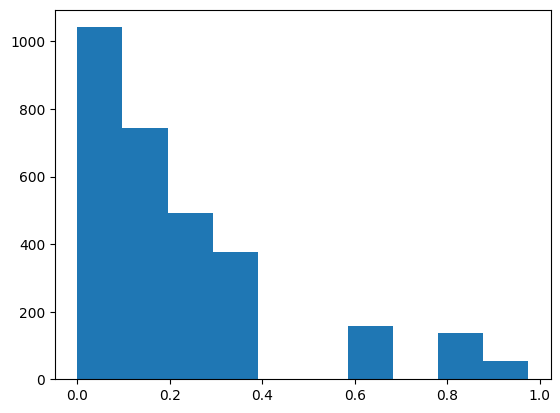

In [23]:
plt.hist(test_score[:,1]);

# This code generates a matplotlib histogram of the predicted churn probabilities for the test set.
# The histogram shows how many customers in the test set were assigned a predicted churn probability within certain ranges
# in this case it's not bad, but the model can perform better.
# because the probabilities tends to be skewed towards the non churn class.

churn            0         1
row_0                       
0.000000  0.333333  0.666667
0.028650  0.973440  0.026560
0.089939  0.926573  0.073427
0.108677  0.861624  0.138376
0.113169  0.870647  0.129353
0.213816  0.800407  0.199593
0.300000  0.692308  0.307692
0.324324  0.500000  0.500000
0.335628  0.660079  0.339921
0.596154  0.414013  0.585987
0.856140  0.128788  0.871212
0.866667  0.400000  0.600000
0.939394  0.133333  0.866667
0.975000  0.000000  1.000000


<Axes: xlabel='row_0'>

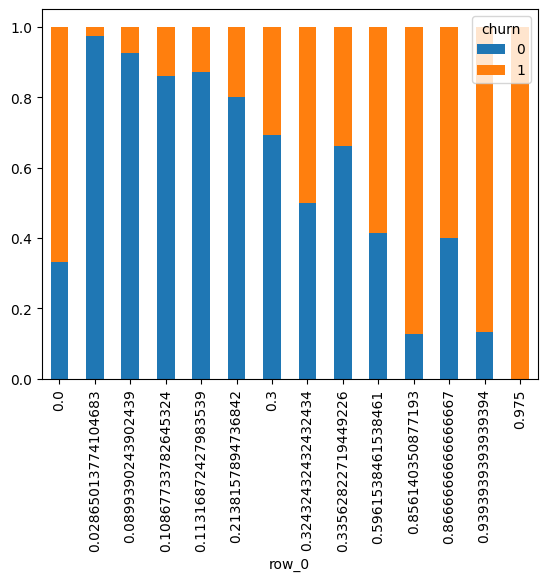

In [24]:
# This crosstab visualization is helpful for evaluating how well the model's predicted probabilities correspond to the actual outcomes.
# Here, we can notice a proportion of churned customers in the bars representing
# an acceptable predicted churn probabilities,
# but the proportion of non-churned customers
# in the bars that represents lower predicted churn probabilities stills higher

score_test_analisis = pd.crosstab(test_score[:,1], y_test[:],normalize='index')

print(score_test_analisis)

score_test_analisis.plot.bar(stacked=True)

In [25]:
# by this confusion matrix metric of the test set, we observe that the modèle prediction
# is missing a high number of churn. even if we have a good percentage
# of precision in predicting reel churners

confusion_test= confusion_matrix(y_test,test_predict)

print( 'test confusion matrix')
print(confusion_test)






test confusion matrix
[[2285   88]
 [ 367  260]]


In [26]:
# By comparing the confusion matrix of the training set to the confusion matrix of the test set,
# We want to get an idea whether the model is overfitting to the training data.
# here we observe that there is no potential overfitting, because both sets have the same metric results

confusion_train = confusion_matrix(y_train, train_predict)

print('train cofusion matrix')
print(confusion_train)

train cofusion matrix
[[5394  195]
 [ 836  575]]


In [27]:
# By using the classification report metrics,
# we can observe the details of what explained above.

print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2373
           1       0.75      0.41      0.53       627

    accuracy                           0.85      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      0.85      0.83      3000



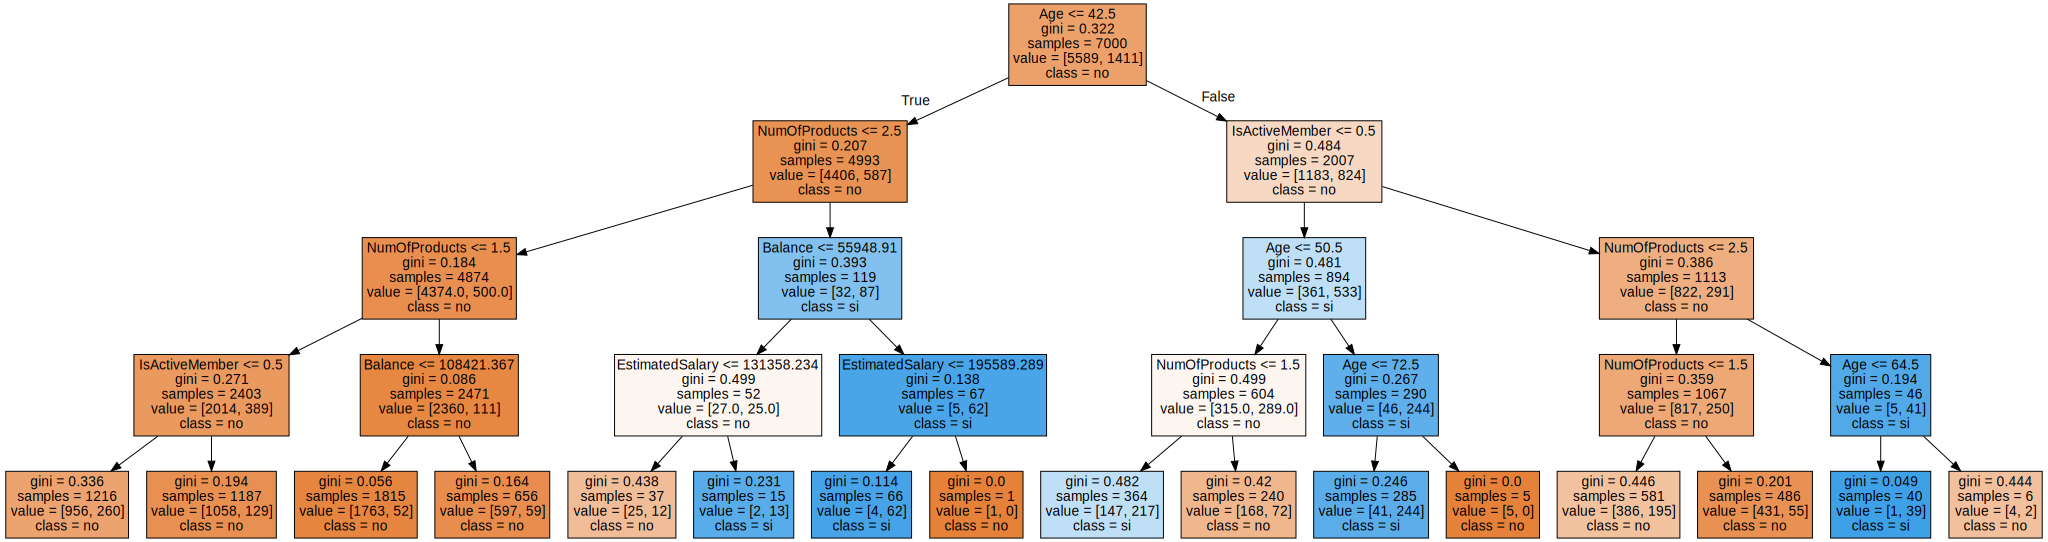

In [28]:
# This visualization allows us to trace the path of a data point through the tree
# and see the conditions at each node that lead to the classification.
# in our case we use it to understand how our model made the above predictions.

from sklearn import tree
import graphviz
tree_data = tree.export_graphviz(decision_tree=dt_model, out_file=None,feature_names=X.columns,class_names=["no", "si"],filled=True)
tree_graph = graphviz.Source(tree_data, format="png")
tree_graph

In [29]:
# installing the mljar pakage and within which
# we import the scikitplot libraryto plot the cumulative gain

! pip install mljar-scikit-plot

import scikitplot as skplt

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=208f01c7d7c9437ba92d2c7201dc80de4d234fc9aa0dba70b587d577cfea9071
  Stored in directory: /root/.cache/pip/wheels/24/e5/1e/3b952f43ebd4bd0a6983c835daa4e226f2eeee4080e5b1ceb9
Successfully built mljar-scikit-plot


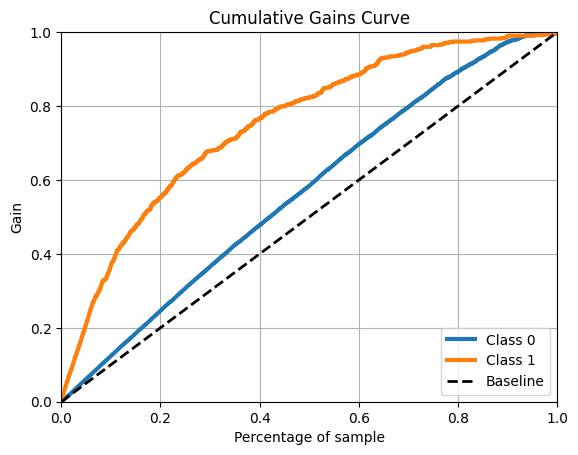

In [30]:
# This cumulative gain plot shows the percentage of churners(class 1) gained by targeting
# a certain percentage of customers based on their predicted probability of being positive.
# our model is not bad in identifying the churners because the orange line (class 1)
# is further above the dashed black baseline.

skplt.metrics.plot_cumulative_gain (y_test, test_score);

## Modeling - Part 2 - We try to manage Class Imbalance

It's true that we have an acceptable cumulative gain, but we also remember that the metrics such as the recall (gain) was not good. the model is missing a high percentage of churners. We will try to resolve the problem by oversampling the positive class of the training set which will be helpfull to balance the proportion of churn vs non churn  preventing the model from making biased predictions on non churn classes.

In [31]:
# let's import the imblearn.oversampling library to manage class imblance

# we choose to import the SMOTE oversampling method to address class imbalance in datasets
# by oversampling the minority class. it creates a synthetic samples of the minority class
# to helps balance distribution

from imblearn.over_sampling import SMOTE



In [32]:
# here we create an instance of a SMOTE oversampling and we train it on our training dataset

over_smote= SMOTE(sampling_strategy=0.5,random_state=1,k_neighbors=2)
X_train_smote, y_train_smote= over_smote.fit_resample(X_train,y_train)

print(Counter(y_train))
print(Counter(y_train_smote))




Counter({0: 5589, 1: 1411})
Counter({0: 5589, 1: 2794})


In [33]:
 # We create another decision tre classiffier model to train it on the
 # balanced X_train and y_train. Like the previous model, we will make the
 # prediction on the test and the train set.

dt_model2 = DecisionTreeClassifier(max_depth=6)

dt_model2.fit(X_train_smote,y_train_smote)


test_predict2 = dt_model2.predict(X_test)
test_score2 = dt_model2.predict_proba(X_test)


train_predict2 = dt_model2.predict(X_train_smote)
train_score2 = dt_model2.predict_proba(X_train_smote)


print(set(test_score2[:,1]))

{np.float64(0.07407407407407407), np.float64(0.6417525773195877), np.float64(0.06609808102345416), np.float64(0.11347517730496454), np.float64(0.0), np.float64(0.3219178082191781), np.float64(0.2026266416510319), np.float64(0.1780821917808219), np.float64(0.2774566473988439), np.float64(0.4689922480620155), np.float64(0.5), np.float64(1.0), np.float64(0.875), np.float64(0.75), np.float64(0.07647058823529412), np.float64(0.18), np.float64(0.5980392156862745), np.float64(0.5412844036697247), np.float64(0.5454545454545454), np.float64(0.953810623556582), np.float64(0.9795918367346939), np.float64(0.8520900321543409), np.float64(0.7156862745098039), np.float64(0.13043478260869565), np.float64(0.23170731707317074), np.float64(0.12030075187969924), np.float64(0.0234192037470726), np.float64(0.027227722772277228), np.float64(0.36231884057971014), np.float64(0.26881720430107525), np.float64(0.8450704225352113), np.float64(0.3333333333333333), np.float64(0.3821138211382114), np.float64(0.030837

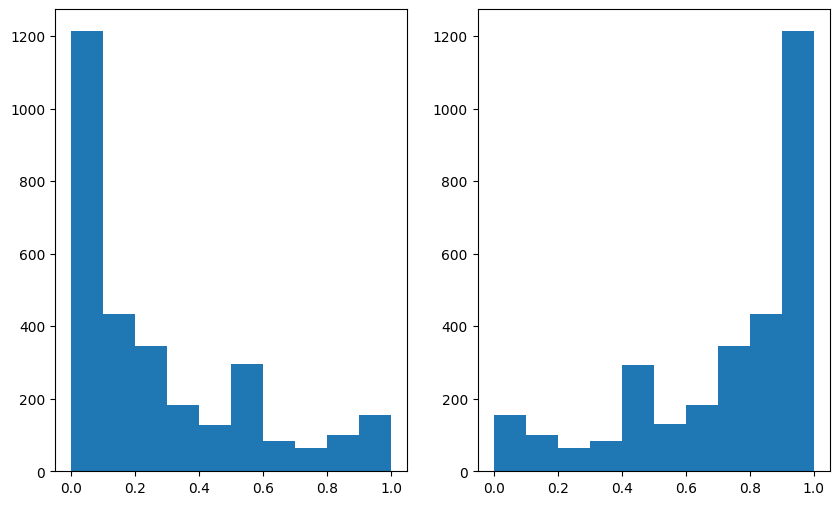

In [34]:
# In this case, the histogram is more evenly distributed compared to the previous model,
# suggesting that the model trained with SMOTE oversampling is better
# at distinguishing between churn and non-churn cases and provides
# a more realistic distribution of predicted probabilities.
fig,ax= plt.subplots(1,2,figsize=(10,6))

ax[0].hist(test_score2[:,1])
ax[1].hist(test_score2[:,0]);

churn            0         1
row_0                       
0.000000  0.692308  0.307692
0.023419  0.981081  0.018919
0.027228  0.986928  0.013072
0.030837  0.957895  0.042105
0.066098  0.904977  0.095023
0.074074  0.958904  0.041096
0.076471  0.934211  0.065789
0.092537  0.960317  0.039683
0.113475  0.894737  0.105263
0.120301  0.755102  0.244898
0.122222  0.931373  0.068627
0.130435  0.974359  0.025641
0.178082  0.873016  0.126984
0.180000  0.925373  0.074627
0.202627  0.816514  0.183486
0.231707  0.702703  0.297297
0.268817  0.827586  0.172414
0.277457  0.750000  0.250000
0.321918  0.897727  0.102273
0.333333  0.851852  0.148148
0.352941  0.000000  1.000000
0.362319  0.681818  0.318182
0.382114  0.733333  0.266667
0.468992  0.826087  0.173913
0.489796  0.724138  0.275862
0.500000  0.000000  1.000000
0.518519  0.860465  0.139535
0.541284  0.591716  0.408284
0.545455  0.357143  0.642857
0.598039  0.537313  0.462687
0.641753  0.722892  0.277108
0.715686  0.253968  0.746032
0.750000  0.00

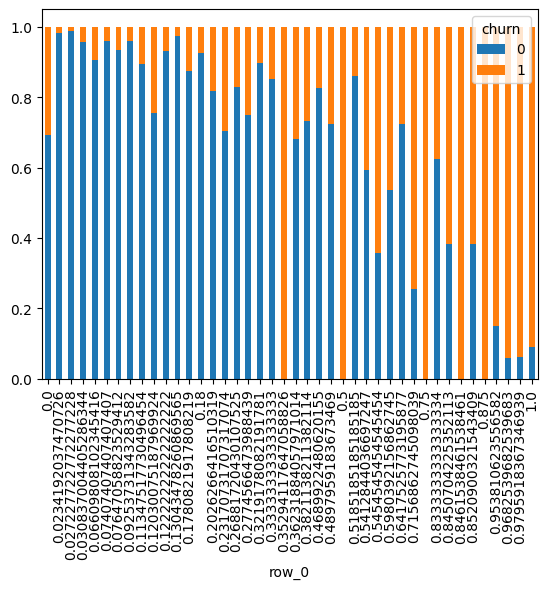

In [35]:
# the crosstab is much more better than the previous one.

print(pd.crosstab(test_score2[:,1],y_test[:],normalize='index'))

pd.crosstab(test_score2[:,1],y_test[:],normalize='index').plot.bar(stacked=True);

In [36]:
# with this cofusion matrix we notice that the second model sacrifices some precision (more False Positives)
# to gain significant improvement in recall (fewer False Negatives) and correctly identifies more churners.
# and This aligns with the goal of addressing class imbalance and
# improving the model's ability to detect the minority class (churn).

confusion_test2= confusion_matrix(y_test,test_predict2)

print( 'test confusion matrix')
print(confusion_test2)

test confusion matrix
[[2066  307]
 [ 238  389]]


In [37]:
confusion_train2= confusion_matrix(y_train_smote,train_predict2)

#confusion_train2= confusion_matrix(y_train_ada,train_predict2)

print( 'train_smote confusion matrix')
print(confusion_train2)

train_smote confusion matrix
[[4932  657]
 [ 902 1892]]


In [38]:
# unlike the previews model, this model sacrifice some percentage of
# precision to cut a high number of churners.

print(classification_report(y_test, test_predict2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2373
           1       0.56      0.62      0.59       627

    accuracy                           0.82      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.83      0.82      0.82      3000



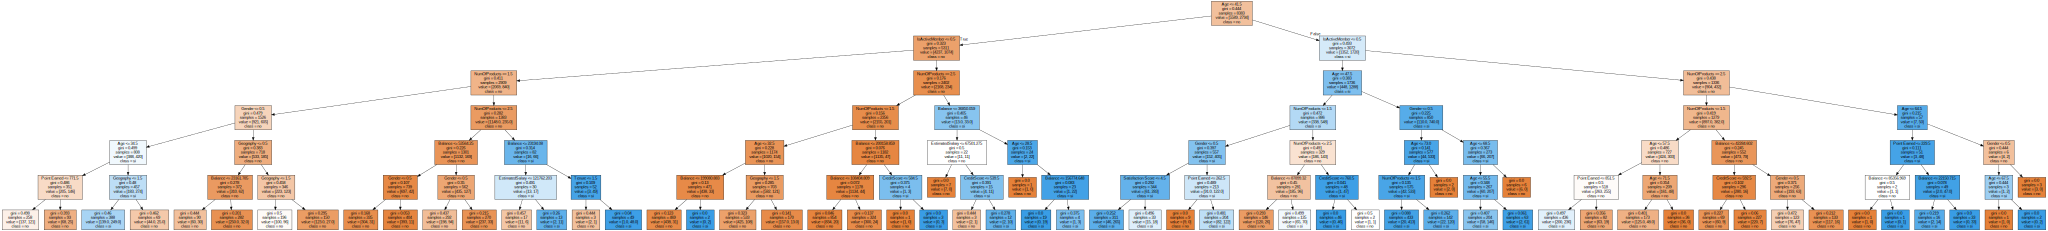

In [39]:
# On the model instance we setted the max_depth at 6 to have the best trad-off
# between avoiding overfitting and have a better recall


tree_data2= tree.export_graphviz(dt_model2,out_file=None,feature_names=X.columns,class_names=['no','si'],filled=True)

tree_graph2 = graphviz.Source(tree_data2,format='png')

tree_graph2

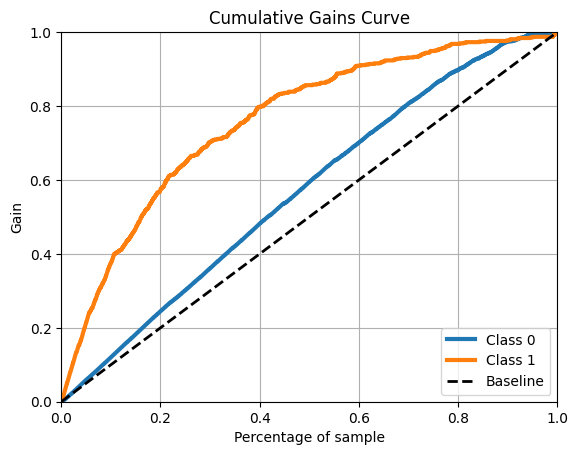

In [40]:
# The orange line (Class 1 - Churn) rises more steeply and is further away from the baseline compared to the first plot.
# this indicates that the second model, trained with SMOTE oversampling, is better at identifying
# a higher percentage of churners by targeting a smaller percentage of the customer
# base with the highest predicted churn probabilities.


skplt.metrics.plot_cumulative_gain(y_test,test_score2);

# Presenting ROI to Business Users

In this part we will try to analyze the return on investment in order to evaluate the financial benefit of using a churn prediction model to retain customers.

In [41]:
# let's hypotize the Costs and the Benefits
# the contact is the amount of money we spend
# every time we call a custumer that is predicted to churn
# and the revenue_profit is the estimated benefit we can have by retaining
# a potential churner.

contact_cost = 3
revenue_profit = 40


In [42]:
# let's build a dataset, with 2 columns, the first being the target test set
# from our original dataset, and the secong column, the predicted probabilities
# of the positive churn class from our second and best model.

roi_analysis= pd.DataFrame(columns=['target','score'])

roi_analysis['target']=y_test.values

roi_analysis['score'] = test_score2[:,1]

# here we built a numpy array containing a sequence of numbers
# from 0.0 to 1.0 (inclusive) with a step of 0.01
# it represents a range of possible probability thresholds
# that we will use later to group customers based on their predicted churn risk.

class_score=np.arange(0.0,1.01,step=0.01)

class_score

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [43]:
# In the same dataset we create another column derivated
# from the binning of the positive probalities of churn risk
# based on the range we built with numpy.
# the aim is to group customers into different churn risk categories
# and then counts how many customers fall into each bin.

roi_analysis['score_bin']= pd.cut(roi_analysis['score'], bins=class_score,include_lowest=True,labels=False)

#roi_analysis['score_bin']= pd.cut(roi_analysis['score'], bins=class_score,include_lowest=True)

roi_analysis['score_bin'].value_counts().sort_index()

,count
score_bin,
0,26
2,523
3,95
6,221
7,222
9,126
11,114
12,151
13,39


In [44]:

# Calculating the total number of churned customers in our test set (y_test)
# which will be divided by the cumulative sum of the target for each score_bin
#
tot_churn_test= np.sum(y_test==1)

print(tot_churn_test)

# Here we group the database by the score_bin column created and apply aggregation functions
# to the data that will count (reported) and sum(hit) the total customer in each score_bin
# Since 'target' contains 0 and 1 (where 1 means churn),
# the sum represents the number of actual churned customers within that bin.

roi_analysis_agg = roi_analysis.groupby('score_bin').agg(reported=('target','count'), hit=('target','sum'))

roi_analysis_agg.sort_values('score_bin',ascending=False)

roi_analysis_agg

627


,reported,hit
score_bin,,
0,26,8
2,523,9
3,95,4
6,221,21
7,222,11
9,126,5
11,114,12
12,151,19
13,39,1


In [45]:
# we compute some cumulative sum

roi_analysis_agg['reported_cum']= roi_analysis_agg['reported'].cumsum()

roi_analysis_agg['hit_cum'] = roi_analysis_agg['hit'].cumsum()

In [46]:
roi_analysis_agg

,reported,hit,reported_cum,hit_cum
score_bin,,,,
0,26,8,26,8
2,523,9,549,17
3,95,4,644,21
6,221,21,865,42
7,222,11,1087,53
9,126,5,1213,58
11,114,12,1327,70
12,151,19,1478,89
13,39,1,1517,90


In [47]:
# here we compute some metrics from the cumulative aggregation of the target()
# for example to compute the precision, we have to calculate the ratio between the actual positive
# churn and the total number of customer for each_bin.

roi_analysis_agg['precision']= roi_analysis_agg['hit_cum']/roi_analysis_agg['reported_cum']

# as we said above to compute the recall we calculated
# the total of the customers who churned from the original test set.
# and we divide this last by the cumulated sum of actual positive churn for each score_bin

roi_analysis_agg['recall']= roi_analysis_agg['hit_cum']/tot_churn_test

# the first calculation purpose is to represent the total cost incurred if you were to contact
# all customers with a predicted churn probability at or above the threshold corresponding to that bin.
# and the second represents the total potential revenue you could gain if you successfully retained
# all the actual churners within the targeted group (customers with a predicted churn probability
# at or above the threshold corresponding to that bin).

roi_analysis_agg['tot_contact_cost']= roi_analysis_agg['reported_cum']*contact_cost

roi_analysis_agg['tot_revenue_profit']= roi_analysis_agg['hit_cum']*revenue_profit


In [48]:
# we compute the final ROI

# what do we see? Which is the optimal threshold?
# what can we say to Marketing Boss?

roi_analysis_agg['return_on_investment'] = roi_analysis_agg['tot_revenue_profit'] - roi_analysis_agg['tot_contact_cost']

roi_analysis_agg

,reported,hit,reported_cum,hit_cum,precision,recall,tot_contact_cost,tot_revenue_profit,return_on_investment
score_bin,,,,,,,,,
0,26,8,26,8,0.307692,0.012759,78,320,242
2,523,9,549,17,0.030965,0.027113,1647,680,-967
3,95,4,644,21,0.032609,0.033493,1932,840,-1092
6,221,21,865,42,0.048555,0.066986,2595,1680,-915
7,222,11,1087,53,0.048758,0.084530,3261,2120,-1141
9,126,5,1213,58,0.047815,0.092504,3639,2320,-1319
11,114,12,1327,70,0.052751,0.111643,3981,2800,-1181
12,151,19,1478,89,0.060217,0.141946,4434,3560,-874
13,39,1,1517,90,0.059328,0.143541,4551,3600,-951


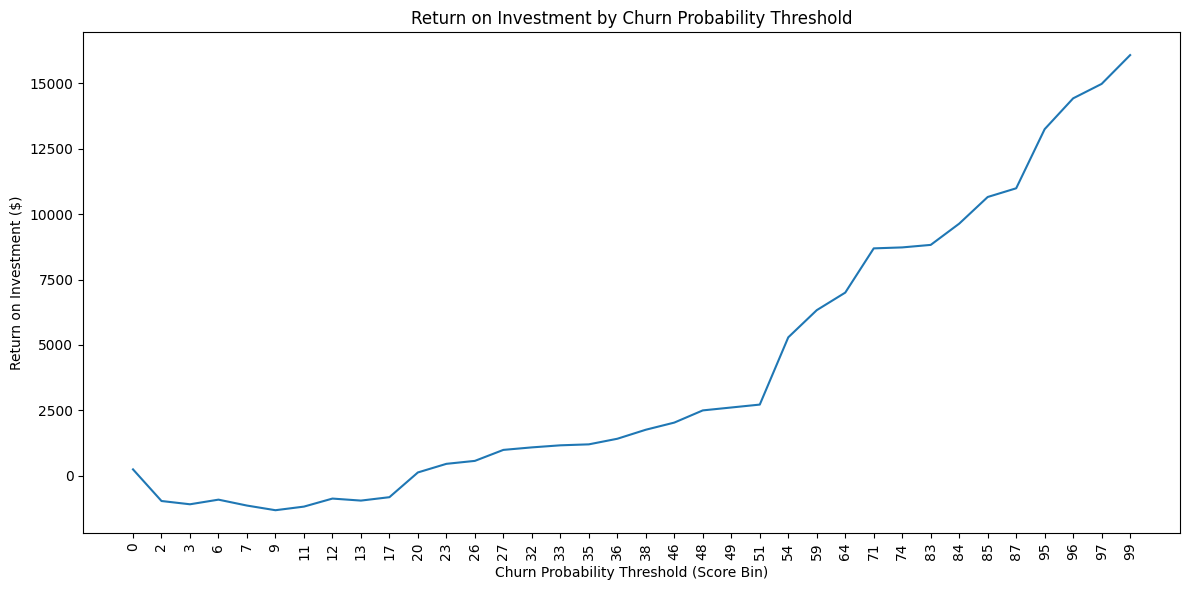

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(roi_analysis_agg.index.astype(str), roi_analysis_agg['return_on_investment'])
plt.xticks(rotation=90)
plt.xlabel('Churn Probability Threshold (Score Bin)')
plt.ylabel('Return on Investment ($)')
plt.title('Return on Investment by Churn Probability Threshold')
plt.tight_layout()
plt.show()

In [50]:
max_roi_bin = roi_analysis_agg['return_on_investment'].idxmax()
max_roi_value = roi_analysis_agg['return_on_investment'].max()

print("The peak ROI is at score bin:",max_roi_bin)
print("The maximum ROI value is: $",max_roi_value)

The peak ROI is at score bin: 99
The maximum ROI value is: $ 16080
